In [5]:
import pandas

In [6]:
people = pandas.read_csv('Titanic.csv', index_col=None)
people.fillna('')

,Unnamed: 0,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
5,6,"Anderson, Mr Harry",1st,47,male,1,0
6,7,"Andrews, Miss Kornelia Theodosia",1st,63,female,1,1
7,8,"Andrews, Mr Thomas, jr",1st,39,male,0,0
8,9,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58,female,1,1
9,10,"Artagaveytia, Mr Ramon",1st,71,male,0,0


In [7]:
print("Known passengers on Titanic:")
all_passengers = len(people.index)
print(all_passengers)

Known passengers on Titanic:
1313


In [8]:
survived = people['Survived']
all_survivors = survived[survived == 1]
print("Survived:")
print(len(all_survivors))

Survived:
450


In [9]:
sex = people[['Sex','Survived']]
males = len(sex[(sex['Sex'] == 'male')])
males_survived = len(sex[(sex['Sex'] == 'male') & (sex['Survived'] == 1)])
percentage = float(males_survived)/float(males)

print("How many males survived (percentage):")
print("{:.2%}".format(percentage))

How many males survived (percentage):
16.69%


In [10]:
females = len(sex[(sex['Sex'] == 'female')])
females_survived = len(sex[(sex['Sex'] == 'female') & (sex['Survived'] == 1)])
percentage = float(females_survived)/float(females)
print("How many females survived (percentage):")
print("{:.2%}".format(percentage))

How many females survived (percentage):
66.67%


In [11]:
by_class = people[['PClass', 'Survived']]

In [12]:
grouped = by_class.groupby('PClass')['Survived'].agg(['sum', 'count'])
print(grouped)

        sum  count
PClass            
*         0      1
1st     193    322
2nd     119    279
3rd     138    711


In [13]:
# remove row with index *
grouped2 = grouped[1:]
print(grouped2)

        sum  count
PClass            
1st     193    322
2nd     119    279
3rd     138    711


In [14]:
results = grouped2['sum'] / grouped2['count']
dicted = results.to_dict()

In [15]:
for key, value in dicted.items():
    print("Survivors in {} class {:.2%}".format(key, value))

Survivors in 1st class 59.94%
Survivors in 3rd class 19.41%
Survivors in 2nd class 42.65%


In [73]:
survived = people[['Age','Survived']]
survived_with_age = survived.dropna()

survived_by_age_g = survived_with_age['Survived'].groupby(survived_with_age['Age']//10 * 10).agg(['count', 'sum'])
survived_by_age_g

,count,sum
Age,,
0.0,53,37
10.0,96,44
20.0,252,84
30.0,168,70
40.0,106,43
50.0,54,26
60.0,23,9
70.0,4,0


Age
0.0     69.811321
10.0    45.833333
20.0    33.333333
30.0    41.666667
40.0    40.566038
50.0    48.148148
60.0    39.130435
70.0     0.000000
dtype: float64


TypeError: unorderable types: numpy.ndarray() < str()

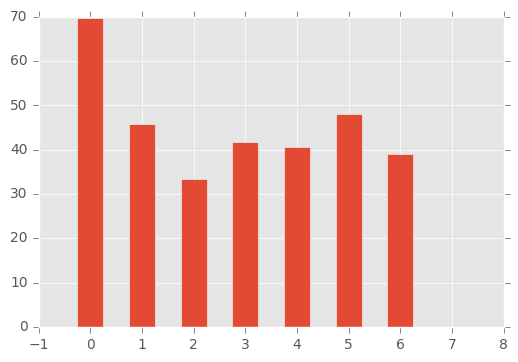

In [86]:
percentage2 = (survived_by_age_g['sum'] / survived_by_age_g['count'])*100
#for item in percentage2.index:
#    print(item)
print(percentage2)
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

percentage2.plot(kind='bar', ylim=(0,100), xticks=['0']*8)()